In [3]:
import pandas as pd
import tensorflow as tf

import numpy as np
import keras

from matplotlib import pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer


df = pd.read_csv("Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.columns,df.dtypes

(Index(['YearsExperience', 'Salary'], dtype='object'),
 YearsExperience    float64
 Salary             float64
 dtype: object)

In [6]:
df["YearsExperience"] = pd.to_numeric(df["YearsExperience"],errors='coerce')

In [7]:
df = df.dropna()


In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
# x = ppl/television
# y = ppl/doctor

x = df["YearsExperience"].values.reshape(-1,1).astype(np.float64)
y = df["Salary"].values.reshape(-1,1).astype(np.float64)

x.shape,y.shape

((30, 1), (30, 1))

Epoch 1/10
30/30 [==============================] - 0s 1ms/step - loss: 1.7249
Epoch 2/10
30/30 [==============================] - 0s 619us/step - loss: 0.5442
Epoch 3/10
30/30 [==============================] - 0s 653us/step - loss: 0.1928
Epoch 4/10
30/30 [==============================] - 0s 619us/step - loss: 0.0882
Epoch 5/10
30/30 [==============================] - 0s 688us/step - loss: 0.0572
Epoch 6/10
30/30 [==============================] - 0s 653us/step - loss: 0.0480
Epoch 7/10
30/30 [==============================] - 0s 653us/step - loss: 0.0454
Epoch 8/10
30/30 [==============================] - 0s 654us/step - loss: 0.0446
Epoch 9/10
30/30 [==============================] - 0s 653us/step - loss: 0.0444
Epoch 10/10
30/30 [==============================] - 0s 653us/step - loss: 0.0443


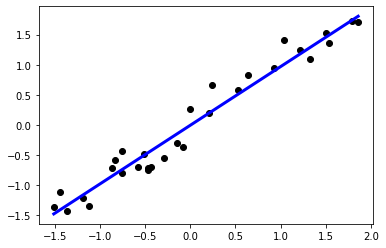

In [24]:
from tensorflow.keras.optimizers import SGD
sc = StandardScaler()
x_ = sc.fit_transform(x)
y_ = sc.fit_transform(y)

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=tf.keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse')
model.fit(x_,y_, batch_size=1, verbose=1, epochs=10, shuffle=False)
plt.scatter(x_,y_,color='black')
plt.plot(x_,model.predict(x_), color='blue', linewidth=3)